# Build Sequences

This notebook is an introduction to how to deal with the sequences classes. All four classes have the `SEQ_CLUSTER` class as a parent and are build similarly. Therefore, we focus on the `DYAD_YEAR_SEQ`class as an example.

In [1]:
import pandas as pd

## Get data

In [2]:
from src.data_loader import get_combined_data, data_preprocessing

In [3]:
df = get_combined_data()
df_africa = data_preprocessing(df)

df_africa.head()

/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/src/data_loader.py:159: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  ucdp_df = pd.read_csv(ucdp_path)


,event_id_cnty,event_date,year,time_precision,disorder_type,actor1,actor2,actor1_id,actor2_id,latitude,...,forest_gc,herb_gc,shrub_gc,urban_gc,water_gc,mountains_mean,rainseas,ttime_mean,dist_border_km_2004,dist_capital_km_2004
0,DRC31402,2023-12-31 00:00:00,2023,1,Political violence,Rioters (Democratic Republic of Congo),NaN,00001,00001,-6.1500,...,6.101852,0.317901,5.641975,0.0,0.000000,0.0,11.0,147.50917,197.57076,904.80680
1,BFO11325,2023-12-31 00:00:00,2023,1,Political violence,JNIM: Group for Support of Islam and Muslims,NaN,00002,00002,12.9871,...,0.893855,1.585972,0.117939,0.0,0.080695,0.0,6.0,235.47472,180.74571,94.08883
2,BFO11326,2023-12-31 00:00:00,2023,1,Political violence,JNIM: Group for Support of Islam and Muslims,Military Forces of Burkina Faso (2022-),00002,00024,13.4417,...,5.561729,31.466050,0.000000,0.0,0.027778,0.0,6.0,411.62473,62.89616,215.85773
3,GAB472,2023-12-31 00:00:00,2023,2,Demonstrations,Protesters (Gabon),NaN,00003,00003,0.3901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHA2083,2023-12-31 00:00:00,2023,2,Political violence,Rioters (Ghana),NaN,00004,00004,7.7254,...,21.685184,0.000000,21.756172,0.0,32.021606,0.0,6.0,342.38196,35.02734,248.70784


# Build a sequence

In [4]:
from src.classes.DYAD_YEAR_SEQ_CLUSTER_class import DYAD_YEAR_SEQ_CLUSTER

In [5]:
dyad_year_seq_cluster = DYAD_YEAR_SEQ_CLUSTER(df=df_africa, # pass data is mandatory
                                              continuous=False, # dafault False
                                              MIN_SEQ_EVENTS=10,  # default 10
                                              MIN_NUMBER_FATALITIES=25) # default 25

In [6]:
print('describtion: ' + dyad_year_seq_cluster.description + '\n')

print('event sequence mapping maps each event id to a seuqence, a sequece name is for example `00001:00001 | 2021–2023´')
print(dyad_year_seq_cluster.event_seq_mapping[0:3])

print('\nThe sequence dict will hold all sequences as conflict event sequences over a time index, for now this is empty') 
print(dyad_year_seq_cluster.sequence_dict)

print('\nmin number of events per seuquence: '+str(dyad_year_seq_cluster.MIN_EVENT_NO))
print('min number of fatalities per year in sequence: '+str(dyad_year_seq_cluster.MIN_NO_FATALITIES))

describtion: One unit is based on one dyad combination and traced over time. A dyad is active as long as it causes 25 fatalities. There is an option to break a sequence if a dyad is not continuously active.

event sequence mapping maps each event id to a seuqence, a sequece name is for example `00001:00001 | 2021–2023´
DRC23853    00001:00001 | 2021–2023
DRC23846    00001:00001 | 2021–2023
DRC23834    00001:00001 | 2021–2023
Name: dyad_year, dtype: object

The sequence dict will hold all sequences as conflict event sequences over a time index, for now this is empty
{}

min number of events per seuquence: 10
min number of fatalities per year in sequence: 25


## Create a sequence dict which holds the actual conflict event sequences

In [7]:
dyad_year_sequences= dyad_year_seq_cluster.extract_sequences(df_africa, index = 'month_year') # index can be 'event_date', 'year', 'month_year'

assert dyad_year_sequences == dyad_year_seq_cluster.sequence_dict

pd.DataFrame(dyad_year_seq_cluster.sequence_dict).head()

,seq,index,event_id_cnty,event_id_list,disorder_type,latitude,longitude,fatalities,actor1,actor2,...,aquaveg_gc,barren_gc,forest_gc,herb_gc,shrub_gc,urban_gc,water_gc,ttime_mean,dist_border_km_2004,dist_capital_km_2004
0,00001:00001 | 2021–2023,"[2021-01-01 00:00:00, 2021-02-01 00:00:00, 202...","[12, 7, 15, 10, 10, 3, 5, 11, 7, 7, 7, 8, 11, ...","[[DRC20191, DRC20189, DRC20143, DRC20116, DRC2...","[[Political violence, Political violence, Demo...","[-3.0824583333333333, -1.7832285714285714, -1....","[28.222308333333334, 25.6963, 26.1309733333333...","[0, 4, 14, 8, 5, 0, 1, 0, 1, 1, 0, 0, 8, 1, 0,...","[Rioters (Democratic Republic of Congo), Riote...","[Rioters (Democratic Republic of Congo), Riote...",...,"[0.8063271561666666, 3.3276013065714287, 13.33...","[0.0015432098333333334, 0.0013227512857142858,...","[81.25926058333333, 75.67724971428571, 56.6168...","[0.011831275316666667, 0.19003526542857146, 0....","[0.5581275658333333, 8.54585517, 3.47880649077...","[0.0, 0.0, 0.0012345678666666668, 0.0, 0.0, 0....","[0.055298352833333335, 0.6397707654285715, 0.9...","[389.41585749999996, 448.35352714285716, 489.1...","[80.84391624999999, 65.87326028571428, 98.1344...","[1449.90905, 1162.9457314285714, 1222.05783666..."
1,00001:00086 | 2020–2022,"[2020-01-01 00:00:00, 2020-02-01 00:00:00, 202...","[1, 1, 3, 2, 2, 2, 3, 1, 2, 1, 8, 3, 3, 2, 2, ...","[[DRC18258], [DRC16629], [DRC16938, DRC16688, ...","[[Political violence], [Political violence], [...","[0.1442, -2.093, 0.1451, -1.4881, 0.1063499999...","[29.3572, 28.9199, 29.245900000000002, 28.9631...","[0, 1, 4, 1, 2, 2, 2, 1, 1, 0, 14, 3, 2, 2, 2,...","[Rioters (Democratic Republic of Congo), Riote...",[Military Forces of the Democratic Republic of...,...,"[2.0092592, 0.72839504, 0.7664608849999999, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[83.669754, 94.03395, 90.32716133333334, 93.60...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0046296295, 0.0606...","[0.0, 0.0, 0.0, 0.0, 2.617284, 0.030864198, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.004115226333333334, 0.0061728395,...","[326.06473, 837.9661, 349.9812, 478.508885, 59...","[109.50676, 70.616, 111.20877999999999, 147.10...","[1577.7155, 1455.7507, 1573.1918333333333, 148..."
2,00001:00180 | 2019–2022,"[2019-01-01 00:00:00, 2019-02-01 00:00:00, 201...","[1, 5, 8, 1, 6, 7, 2, 9, 6, 18, 7, 7, 1, 5, 14...","[[DRC13474], [DRC13685, DRC13630, DRC13566, DR...","[[Demonstrations], [Political violence, Demons...","[-11.6596, -2.61406, -3.4558125000000004, -0.0...","[27.4741, 27.180200000000003, 25.2334, 29.3744...","[4, 2, 2, 1, 2, 2, 0, 7, 5, 7, 11, 2, 0, 5, 5,...","[Rioters (Democratic Republic of Congo), Riote...",[Police Forces of the Democratic Republic of C...,...,"[0.42592594, 4.297530849999999, 1.511959913875...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002...","[97.08951, 70.3080238, 48.02932225, 95.11729, ...","[0.0, 0.0055555555999999996, 0.119598759975, 0...","[2.2685184, 1.6654321064000002, 7.619984431, 0...","[0.0, 0.0, 0.0, 0.0, 0.0010288066, 0.0, 0.0, 0...","[0.0, 1.06419752, 0.8923611, 0.0, 0.4645061833...","[516.9575, 334.89000799999997, 258.2526425, 45...","[25.803318, 120.40305149999999, 104.11603925, ...","[1503.3053, 1303.67312, 1090.17235875, 1560.69..."
3,00001:00259 | 2001–2023,"[2001-04-01 00:00:00, 2001-06-01 00:00:00, 201...","[1, 14, 1, 2, 2, 5, 7, 6, 4, 2, 3, 1, 10, 3, 8...","[[ZAM69], [DRC1596, DRC1595, DRC1593, DRC1592,...","[[Demonstrations], [Political violence, Politi...","[-10.1166, 2.8622, 1.4333, -1.9051500000000001...","[32.5333, 30.8414, 30.0333, 20.2559, 29.7653, ...","[1, 799, 0, 0, 4, 6, 10, 8, 5, 1, 3, 0, 11, 1,...","[Rioters (Democratic Republic of Congo), Riote...","[Civilians (Democratic Republic of Congo), Civ...",...,"[1.7685186, 0.10493827, 0.8518519, 4.390432085...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.001851851800000000...","[73.854935, 53.712963, 81.81173, 45.901232, 73...","[0.037037037, 0.0, 0.0030864198, 0.1604938199,...","[17.11111, 4.4444447, 0.

List of metrices and how they are aggregated over the index:

In [8]:
dyad_year_seq_cluster.metric_mapping

{'event_id_list': 'list',
 'event_id_cnty': 'count',
 'disorder_type': 'list',
 'latitude': 'mean',
 'longitude': 'mean',
 'fatalities': 'sum',
 'actor1': 'first',
 'actor2': 'first',
 'actor1_id': 'first',
 'actor2_id': 'first',
 'source_dataset': 'first',
 'dyad': 'unique count',
 'gid': 'unique count',
 'agri_gc': 'mean',
 'aquaveg_gc': 'mean',
 'barren_gc': 'mean',
 'forest_gc': 'mean',
 'herb_gc': 'mean',
 'shrub_gc': 'mean',
 'urban_gc': 'mean',
 'water_gc': 'mean',
 'ttime_mean': 'mean',
 'dist_border_km_2004': 'mean',
 'dist_capital_km_2004': 'mean'}

This can be changed by passing another `agg_dict` to the function `extract_sequences()`, or for a terminal change adjust the `DEFAULT_METRIC_AGG_MAP` in `constants.py`

## Plotting and summary options

### Summary

In [9]:
dyad_year_seq_cluster.describe_sequences()

Sequence Overview
Total sequences:                    1242
Events in a sequence:               200334
Events not in a sequence:           197604 (min events: 10)

----------------------------------------
Sequence Length (Number of Events)
----------------------------------------
Mean       161.30
Std        397.82
Min        10
Max        4730

----------------------------------------
Sequence Duration (Index: month_year)
----------------------------------------
Mean       4.12
Std        5.30
Min        0.00
Max        26.91

----------------------------------------
Metric Distribution Summary
----------------------------------------
event_id_cnty (count):
  Mean     5.6606
  Std      10.9833
  Min      1.1111
  Max      304.1111

latitude (mean):
  Mean     8.3160
  Std      10.8100
  Min      -29.3058
  Max      36.5220

longitude (mean):
  Mean     22.4543
  Std      15.3149
  Min      -16.3058
  Max      49.6057

fatalities (sum):
  Mean     42.0586
  Std      163.1081
  Min      

### Investigate a single sequence

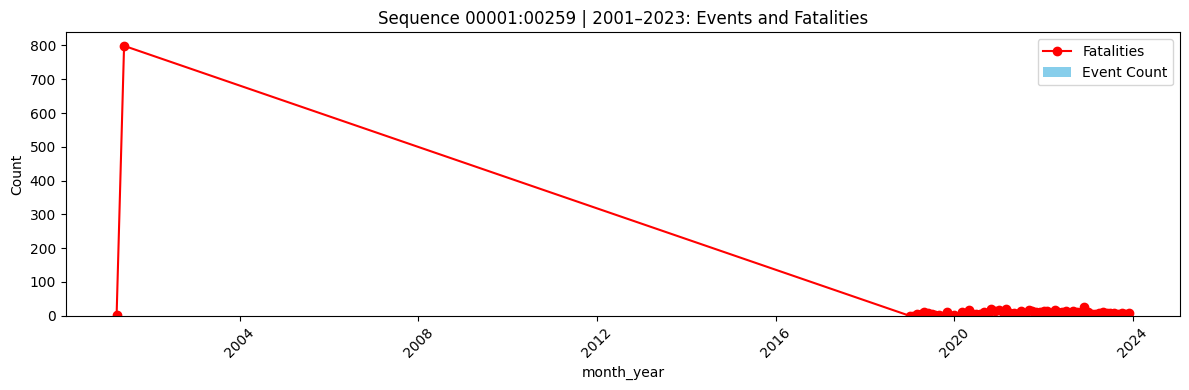

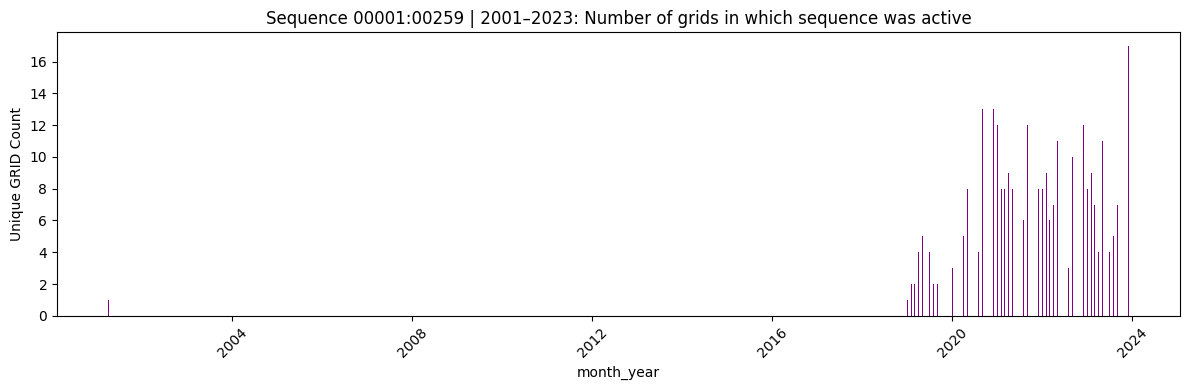

/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/src/classes/SEQ_CLUSTER_class.py:441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_date'] = pd.to_datetime(df['event_date'])


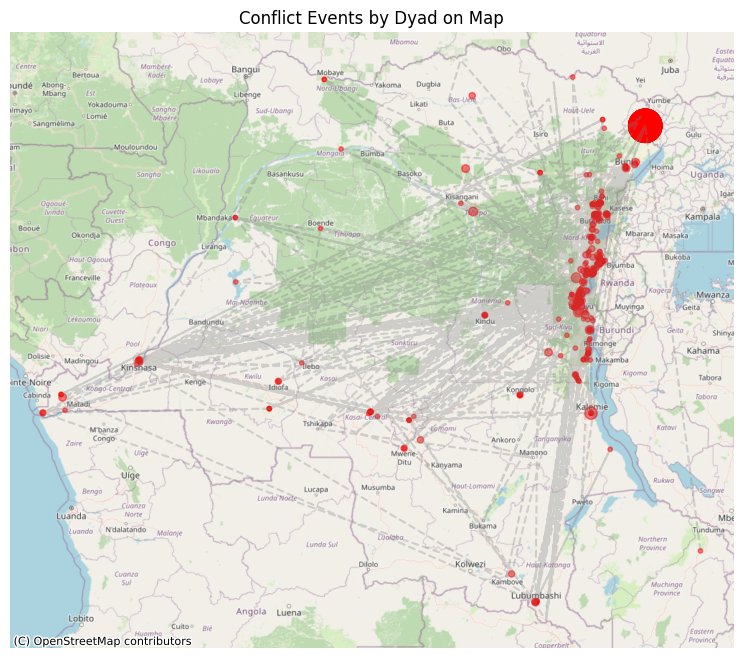

In [10]:
dyad_year_seq_cluster.plot_sequence(num=3)
dyad_year_seq_cluster.plot_map(num=3 , df=df_africa)

### Investigate distribution of aggregated metrices over sequences

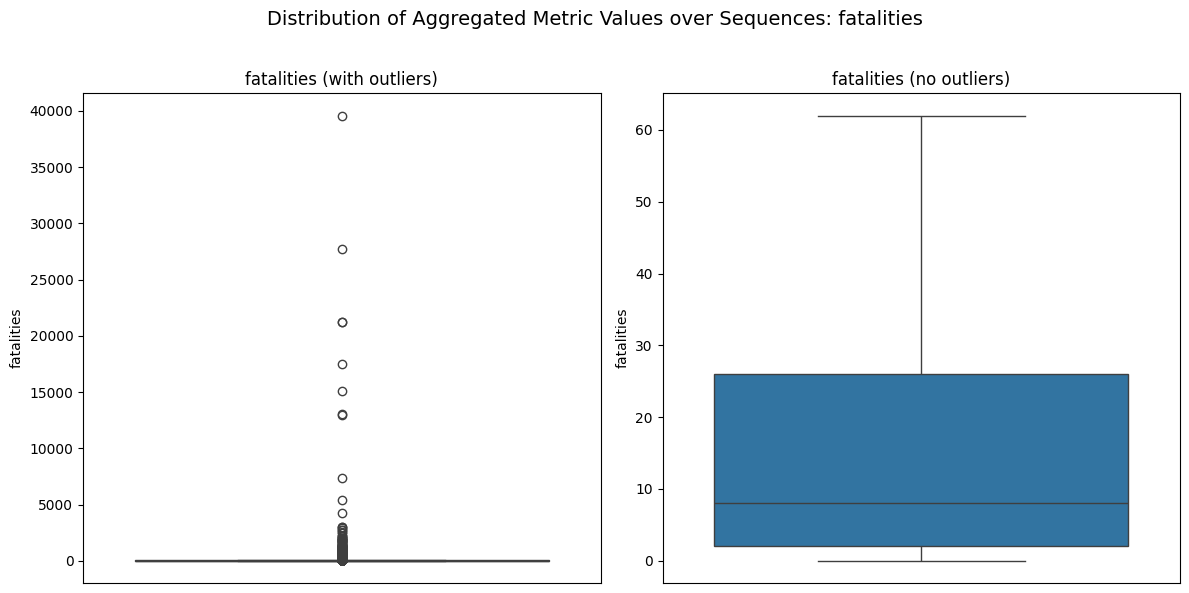

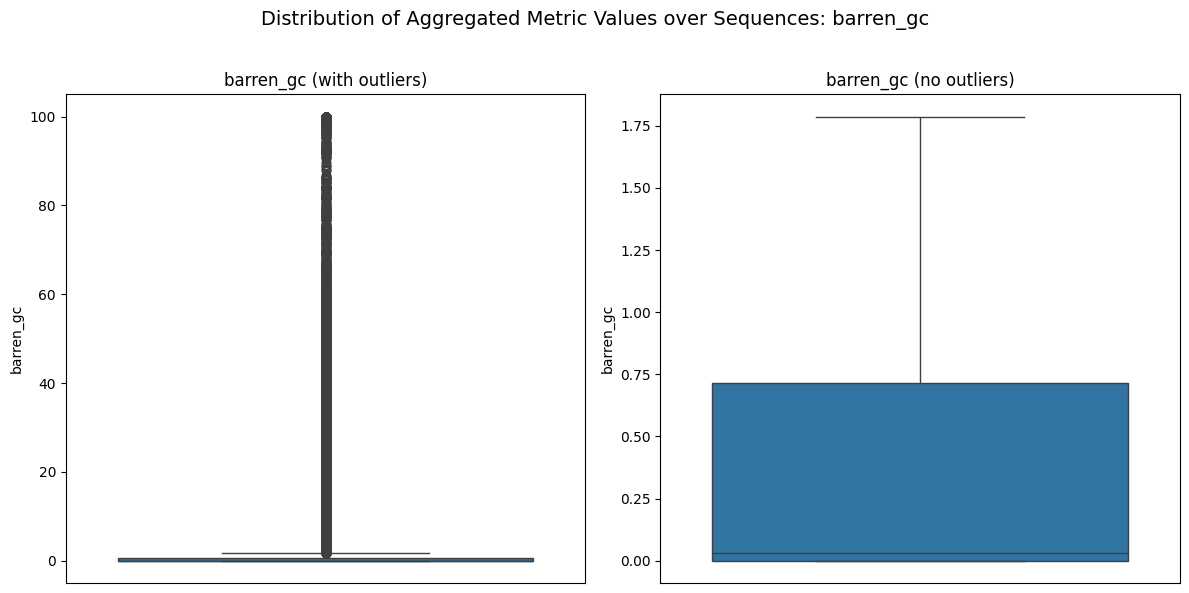

In [11]:
dyad_year_seq_cluster.plot_metric_boxplot(metric='fatalities')
dyad_year_seq_cluster.plot_metric_boxplot(metric='barren_gc')

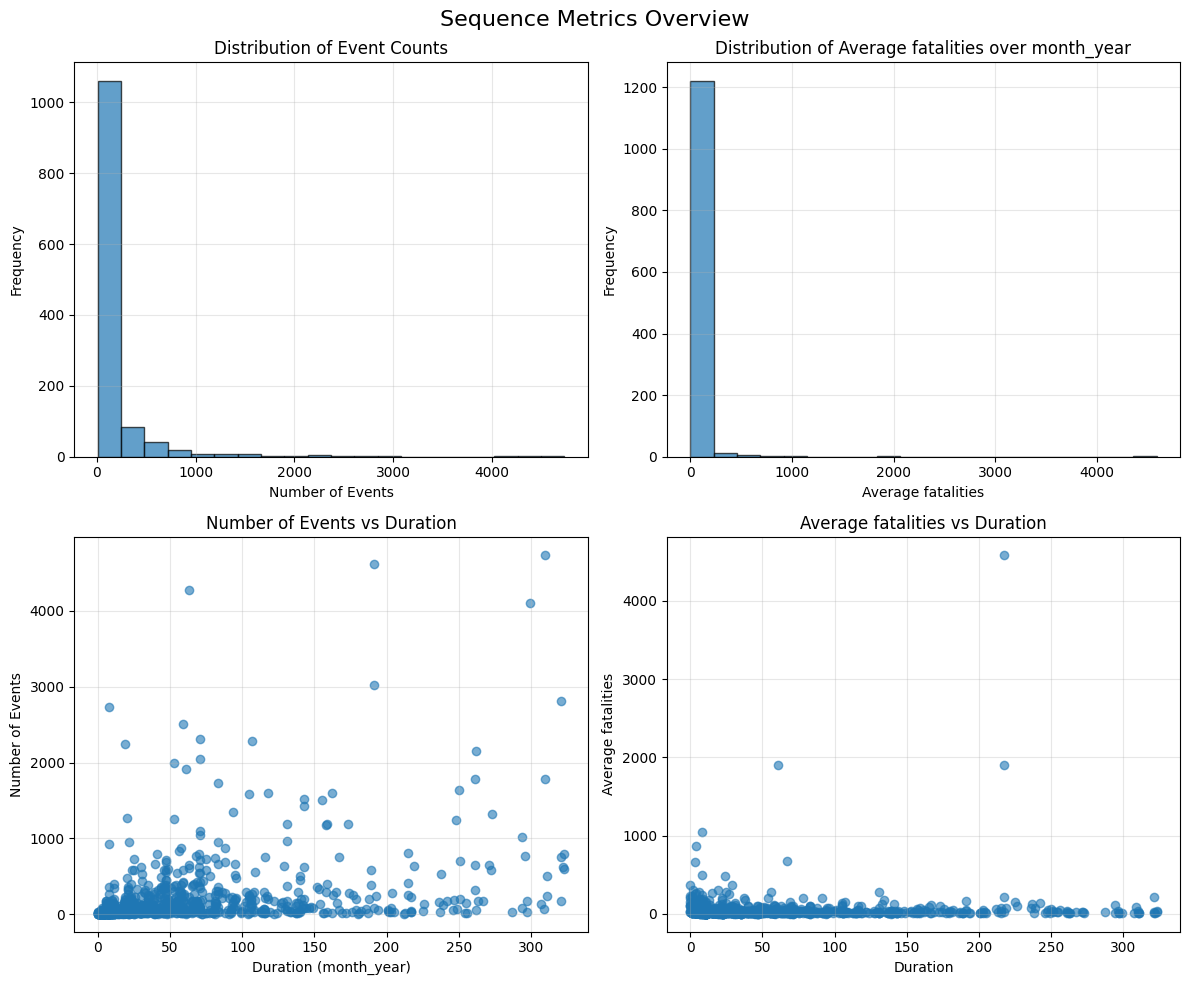

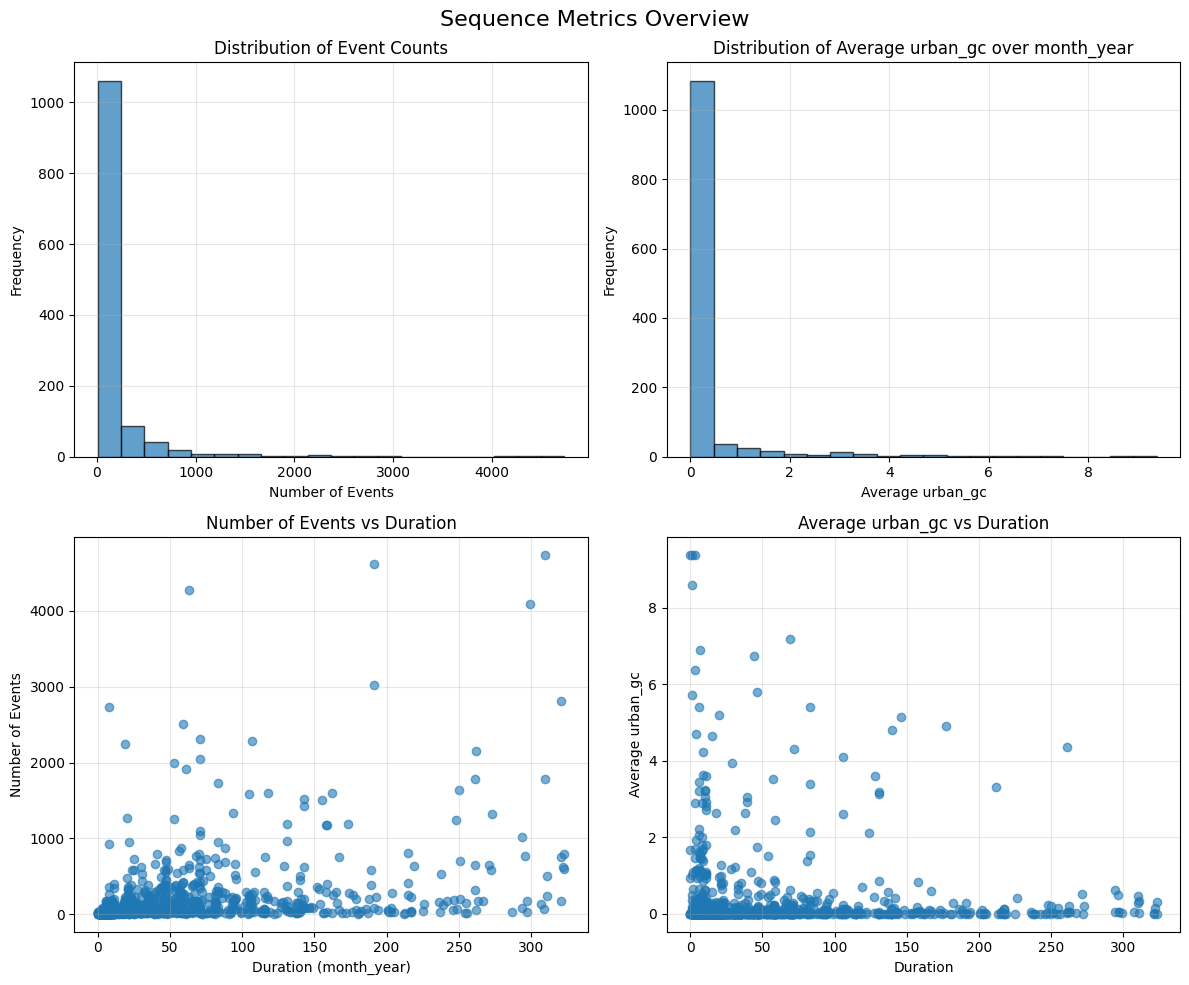

In [12]:
dyad_year_seq_cluster.plot_sequence_metrics_matrix(metric='fatalities')
dyad_year_seq_cluster.plot_sequence_metrics_matrix(metric='urban_gc')

# Note for the other Sequence types

In [13]:
from src.classes.EMBEDDING_SEQ_CLUSTER_class import EMBEDDING_SEQ_CLUSTER
from src.classes.COMBINED_DYAD_YEAR_SEQ_CLUSTER_class import COMBINED_DYAD_YEAR_SEQ_CLUSTER
from src.classes.HDBSCAN_SEQ_CLUSTER_class import HDBSCAN_SEQ_CLUSTER

Total nodes: 19189
Total edges: 5529
Total small sequences in subnetwork: 3080


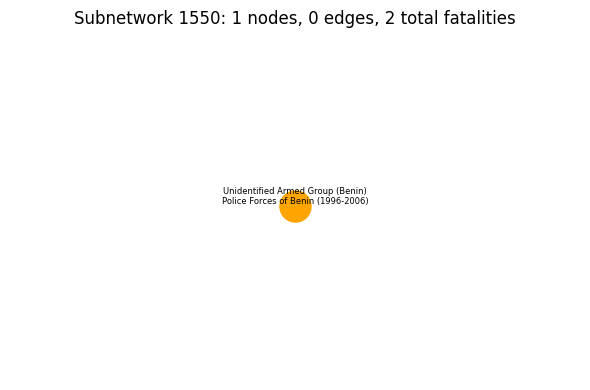

In [14]:
combined_dyad_year_seq_cluster = COMBINED_DYAD_YEAR_SEQ_CLUSTER(df_africa, index = 'month_year') # this is the only sequence where you pick the index here already
combined_dyad_year_sequences= combined_dyad_year_seq_cluster.extract_sequences(df_africa)
combined_dyad_year_seq_cluster.plot_network(num= 1550) # each sequence comes with an additional connected subnetwork that is the connection of its actor-based presequences

In [15]:
HDBScan_seq_cluster = HDBSCAN_SEQ_CLUSTER(df_africa, HDBSCAN_MIN_SEQ_LENGTH=10)
# this has additional parameters to deal with HDBScan
HDBScan_sequences = HDBScan_seq_cluster.extract_sequences(df_africa, index='month_year')

Performing HDBSCAN clustering


/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/consulting_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/consulting_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
embedding_seq_cluster = EMBEDDING_SEQ_CLUSTER(df_africa, force_recompute=False, force_recompute_embeddings=False, HDBSCAN_MIN_SEQ_LENGTH=10)
# this has additional parameters to deal with HDBScan, and handel the embedding (the embedded data has a caching option)
embedding_sequences = embedding_seq_cluster.extract_sequences(df_africa, index='month_year')

Loading existing processed data from /Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/data/processed_data/embedding_data_seq.csv


/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/src/classes/EMBEDDING_SEQ_CLUSTER_class.py:86: DtypeWarning: Columns (0,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(processed_data_path)


Some event values are missing in the final mapping index:
[260005 244683 241287 ... 497402 506711 507806]
